# Basic Inference - Object Detection and Pose Estimation on Static Images with YOLO

References: https://docs.ultralytics.com/

In [ ]:
#!pip install -U ultralytics
#!pip install datasets
import ultralytics
from ultralytics import YOLO
from datasets import load_dataset
import matplotlib.pyplot as plt
import random

## Object Detection - Inference on Unseen Data

Here we will download a new dataset that the pretrained model has never seen before, and practice running inference on static images.

More references can be found at: https://docs.ultralytics.com/modes/predict/

In [4]:
# Download the dataset:
# Credit: https://huggingface.co/datasets/keremberke/german-traffic-sign-detection
traffic_ds = load_dataset("keremberke/german-traffic-sign-detection", name="full")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


0000.parquet:   0%|          | 0.00/51.4M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/14.3M [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/7.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/383 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/108 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/54 [00:00<?, ? examples/s]

In [3]:
# Load the basic YOLOv11 Object Detection Model:
model_detect = YOLO("yolo11s.pt")

100%|██████████| 18.4M/18.4M [00:00<00:00, 126MB/s] 


In [13]:
# Define paths for images we want to predict on - these can be local files, web addresses, etc.
# In this case we will designate the 1st and 10th observations from our dataset:
image_path_1 = traffic_ds['train'][0]['image']
image_path_10 = traffic_ds['train'][9]['image']

# Define a generator of results objects:
results = model_detect([image_path_1, image_path_10], stream=True)

# Process results generator
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    #result.save(filename="result.jpg")  # save to disk

Output hidden; open in https://colab.research.google.com to view.

## Inference with Pose Estimation Model:
We can run the same type of inference on static images using a pose estimation model.

https://docs.ultralytics.com/tasks/pose/

In [14]:
# First load the pose detection model:
model_pose = YOLO("yolo11n-pose.pt")

100%|██████████| 5.97M/5.97M [00:00<00:00, 71.5MB/s]


In [ ]:
# We will also load a more relevant dataset:
# Credit: https://huggingface.co/datasets/nihaludeen/sports_classification
pose_ds = load_dataset("nihaludeen/sports_classification")


0: 640x640 1 person, 206.2ms
1: 640x640 2 persons, 206.2ms


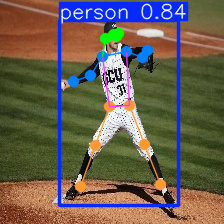

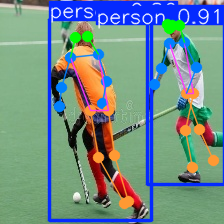

Speed: 3.3ms preprocess, 206.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


In [42]:
# Define paths for images we want to predict on - these can be local files, web addresses, etc.
# In our case we will designate the 1st and 10th observations from our dataset:
image_path_12 = pose_ds['train'][12]['image']
image_path_82 = pose_ds['train'][82]['image']

# Run batched inference on single image or list of images
#results_pose = model_pose(image_path_12, stream=True)
results_pose = model_pose([image_path_12, image_path_82], stream=True)


# Process results generator
for result in results_pose:
    boxes = result.boxes  # Boxes object for bounding box outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    #result.save(filename="result.jpg")  # save to disk

In [27]:
# To run inference on an entire dataset, we have to iterate over all ofthe images:
results_pose_all = model_pose([x['image'] for x in pose_ds['train']], stream=True)

In [33]:
# Print 6 random results from the dataset:

# Randomly select 6 indices and create a list of image paths for the selected indices:
random.seed(42)
random_indices = random.sample(range(len(pose_ds['train'])), 6)
image_paths = [pose_ds['train'][i]['image'] for i in random_indices]

# Run inference on the selected images
results_random = model_pose(image_paths, stream=True)

# Display the results in a 2x3 grid
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, result in enumerate(results_random):
    row = i // 3
    col = i % 3
    axs[row, col].imshow(result.plot())
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

As you can see, some of these predictions are better than others, and some are not useful either due to too many predictions per image or issues with the image resolution, etc.

In the following notebooks we will look at several ways to improve upon the out-of-the-box model options, first by augmenting the underlying training data and then by training entirely new models with domain/task-specific datasets.